In [112]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import seaborn as sns

In [148]:
#loading data
iris=load_iris()
iris_df=pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['species']=iris.target

In [144]:
print("Modified Iris Dataset:")
print(iris_df.head())

Modified Iris Dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


In [150]:
#drop species column
clustering_data = iris_df.drop(['species'], axis=1)

In [152]:
# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(clustering_data)
iris_df['kmeans_cluster'] = kmeans.labels_

C:\Users\arunv\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


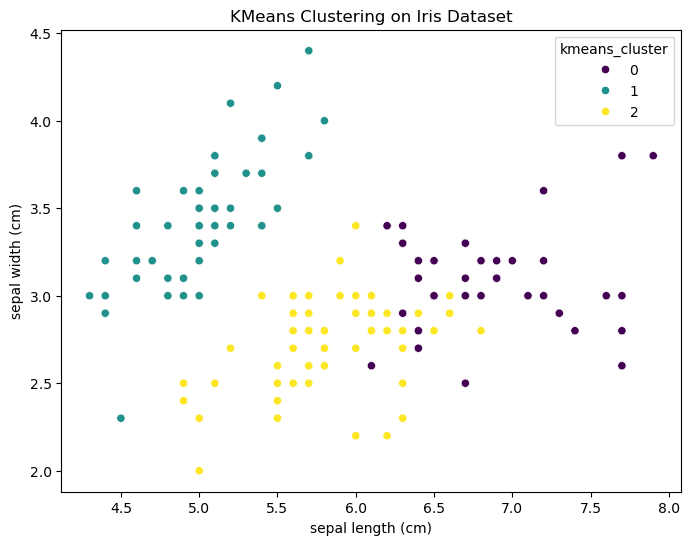

In [154]:
# Visualize KMeans Clustering
plt.figure(figsize=(8, 6))
sns.scatterplot(x=iris_df.iloc[:, 0], y=iris_df.iloc[:, 1], hue=iris_df['kmeans_cluster'], palette='viridis')
plt.title("KMeans Clustering on Iris Dataset")
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.show()

In [156]:
# Perform hierarchical clustering
linkage_matrix = linkage(iris_df.iloc[:, :-1], method='ward')
iris_df['hierarchical_cluster'] = fcluster(linkage_matrix, t=3, criterion='maxclust')

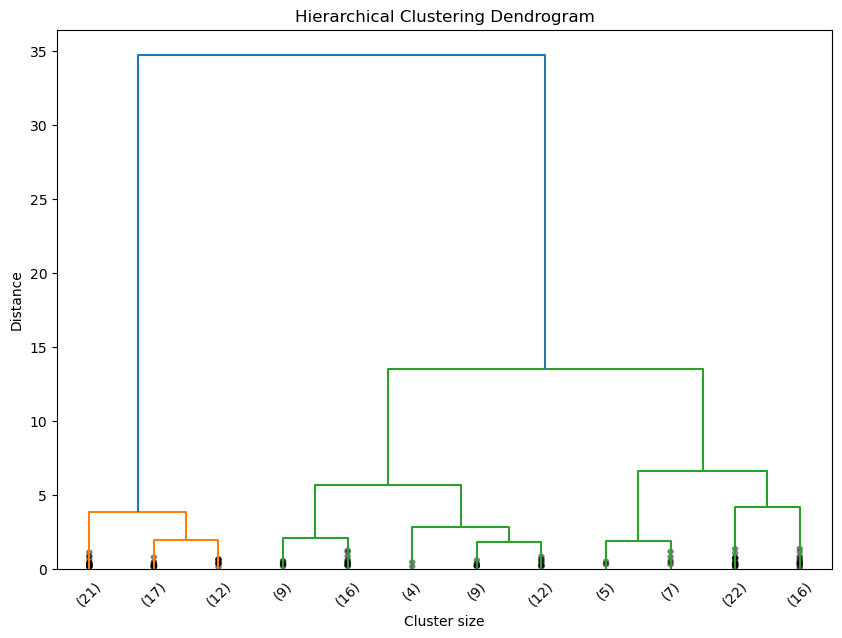

In [158]:
# Visualize the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix, truncate_mode='lastp', p=12, leaf_rotation=45, leaf_font_size=10, show_contracted=True)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Cluster size")
plt.ylabel("Distance")
plt.show()

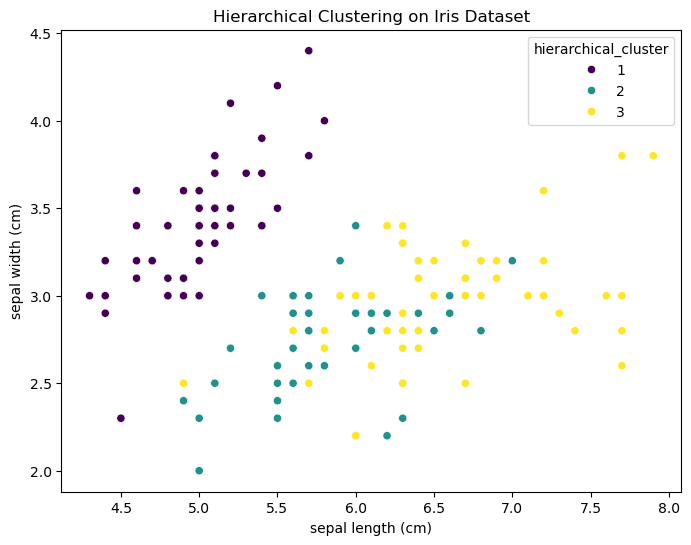

In [162]:
# Visualize the clusters (using first two features for simplicity)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=iris_df.iloc[:, 0], y=iris_df.iloc[:, 1], hue=iris_df['hierarchical_cluster'], palette='viridis')
plt.title("Hierarchical Clustering on Iris Dataset")
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.show()